In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [51]:
data= pd.read_csv(r"C:\Users\HP\Desktop\ujwala ds project\Project 3\drugsCom_raw (1).tsv",sep="\t")

In [52]:
data.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [53]:
list(data)

['Unnamed: 0',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

In [54]:
data.shape

(161297, 7)

In [55]:
data.nunique()

Unnamed: 0     161297
drugName         3436
condition         884
review         112329
rating             10
date             3579
usefulCount       389
dtype: int64

In [56]:
data.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [57]:
data.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [58]:
data.dropna(axis=0,inplace=True)

In [59]:
data =data.dropna()

In [60]:
data.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [61]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
161292    False
161293    False
161294    False
161295    False
161296    False
Length: 160398, dtype: bool

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160398 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   160398 non-null  int64  
 1   drugName     160398 non-null  object 
 2   condition    160398 non-null  object 
 3   review       160398 non-null  object 
 4   rating       160398 non-null  float64
 5   date         160398 non-null  object 
 6   usefulCount  160398 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 9.8+ MB


In [63]:
data.describe()

Unnamed: 0         rating    usefulCount
count  160398.000000  160398.000000  160398.000000
mean   115957.147309       6.995923      28.097613
std     67015.899492       3.272303      36.457876
min         2.000000       1.000000       0.000000
25%     58065.250000       5.000000       6.000000
50%    115845.500000       8.000000      16.000000
75%    173826.750000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

## DATA VISUALIZATION

## VISUALIZATION OF DRUG NAMES / RATINGS / CONDITIONS

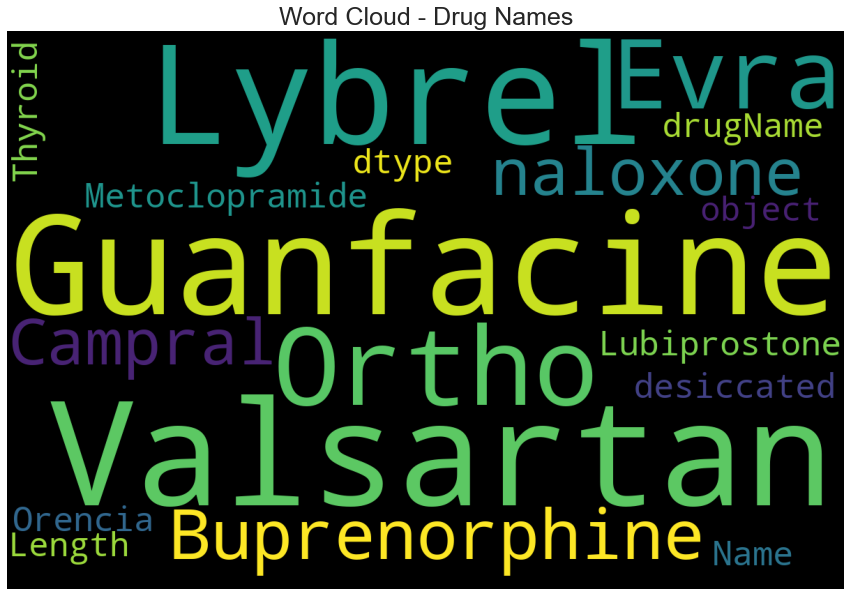

In [65]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

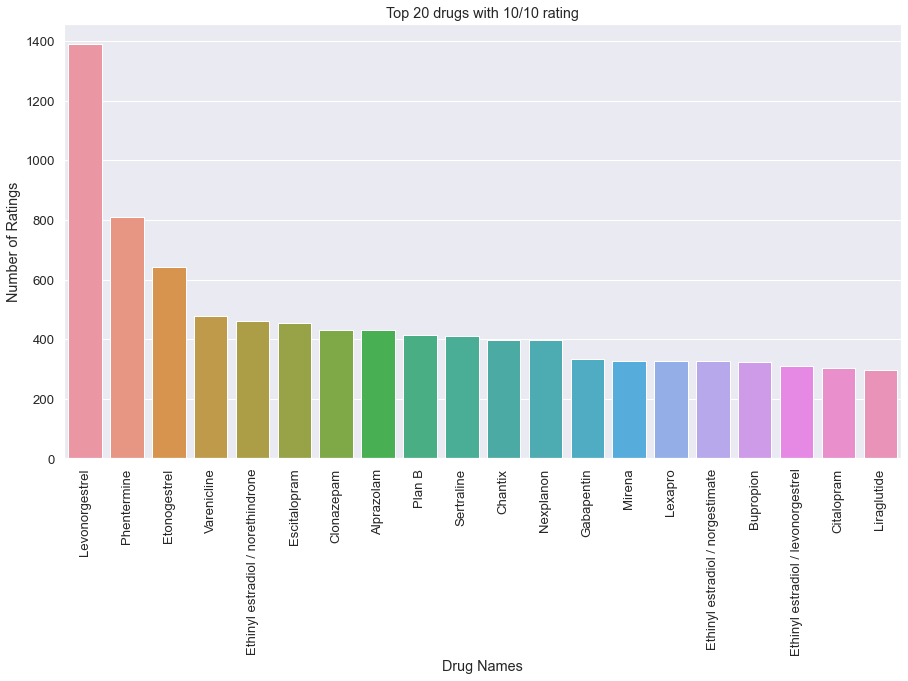

In [66]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

 The is a bar graph which shows the top 20 drugs given in the data set with a rating of 10/10. 'Levonorgestrel' is the drug with the highest number of 10/10 ratings

In [67]:
# Distribution of rating by size
data.groupby('rating').size()

rating
1.0     21504
2.0      6879
3.0      6465
4.0      4980
5.0      7959
6.0      6301
7.0      9395
8.0     18791
9.0     27379
10.0    50745
dtype: int64

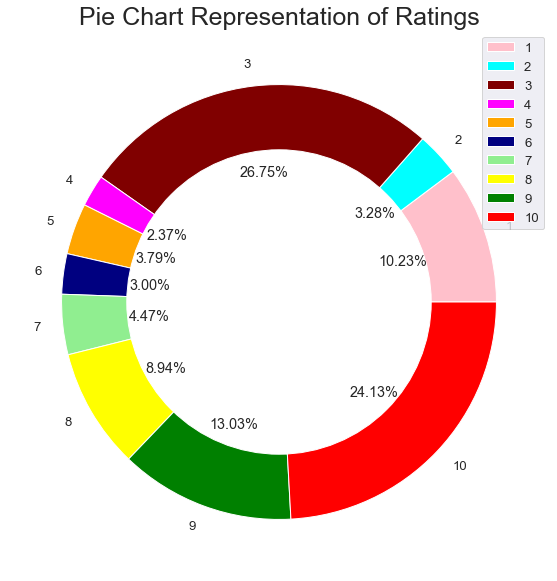

In [68]:
# making a donut chart to represent share of each ratings

size = [21619, 6930, 56512, 5012, 8012, 6343, 9452,
       18888, 27526, 50971]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow', 'green', 'red']
labels = "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

Text(0.5, 0, 'Rating')

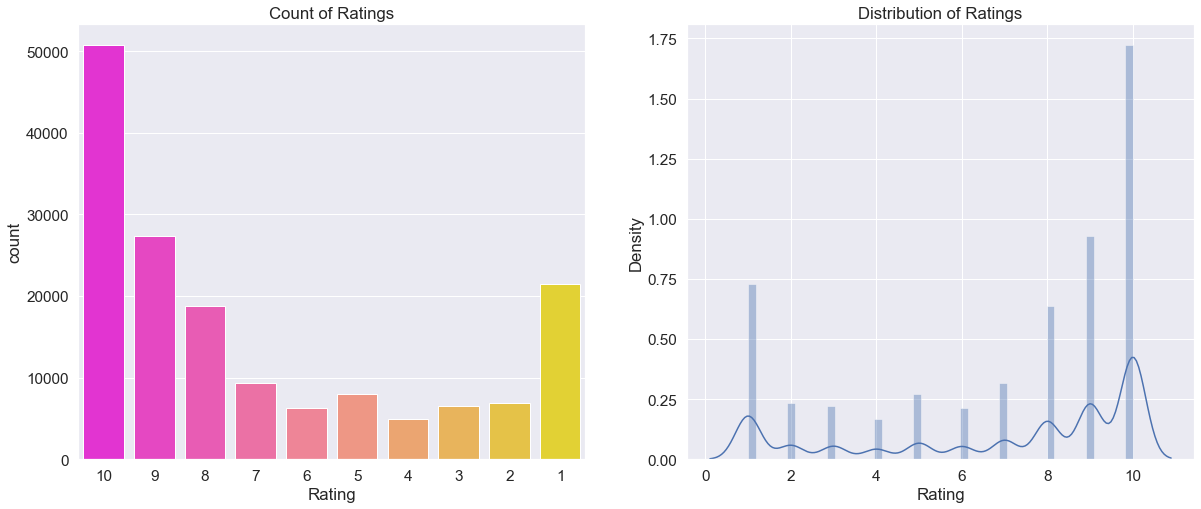

In [69]:
import warnings
warnings.filterwarnings('ignore')
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

 The shows a distribution plot on the right hand side and a bar graph of the same on the left hand side. This shows the distribution of the ratings from 1 to 10 in the data set.

In [70]:
conditions = data.condition.value_counts().sort_values(ascending=False)
conditions[:10]

Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

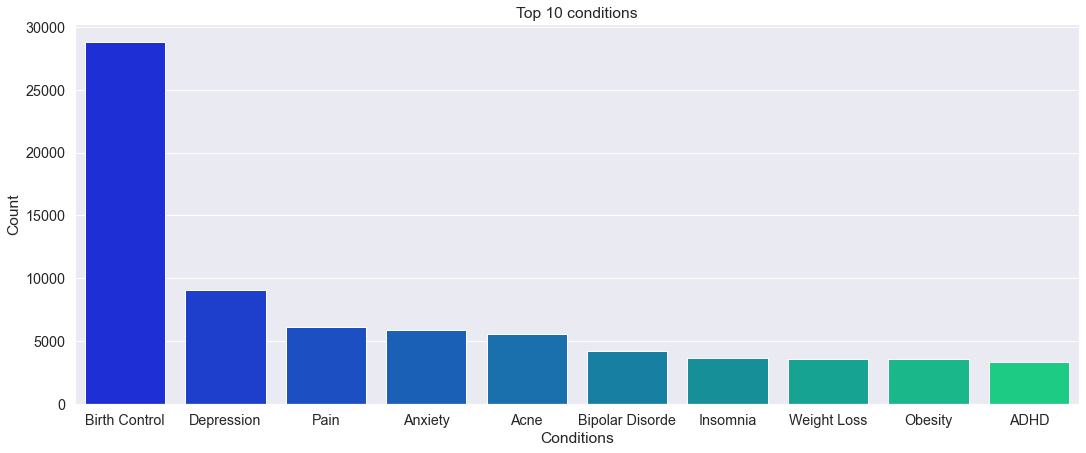

In [71]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");


 The is a bar graph which exhibits the top 10 conditions the people are suffering from. In this data set 'Birth Control' is the most prominent condition by a very big margin followed by Depression and pain.

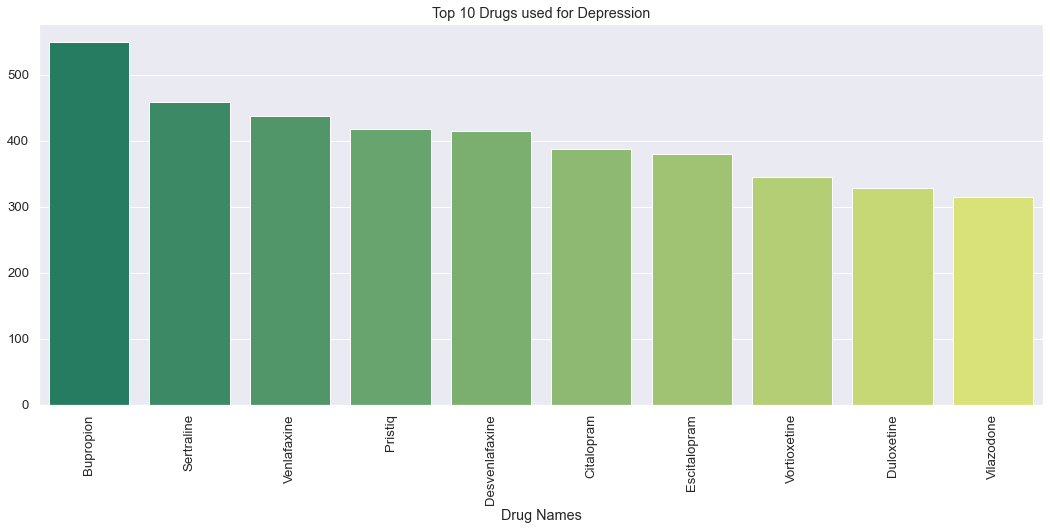

In [72]:
# Top 10 drugs which are used for the top condition, that is Depression
df1 = data[data['condition'] == 'Depression']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Depression")
plt.setp(sns_.get_xticklabels(), rotation = 90);

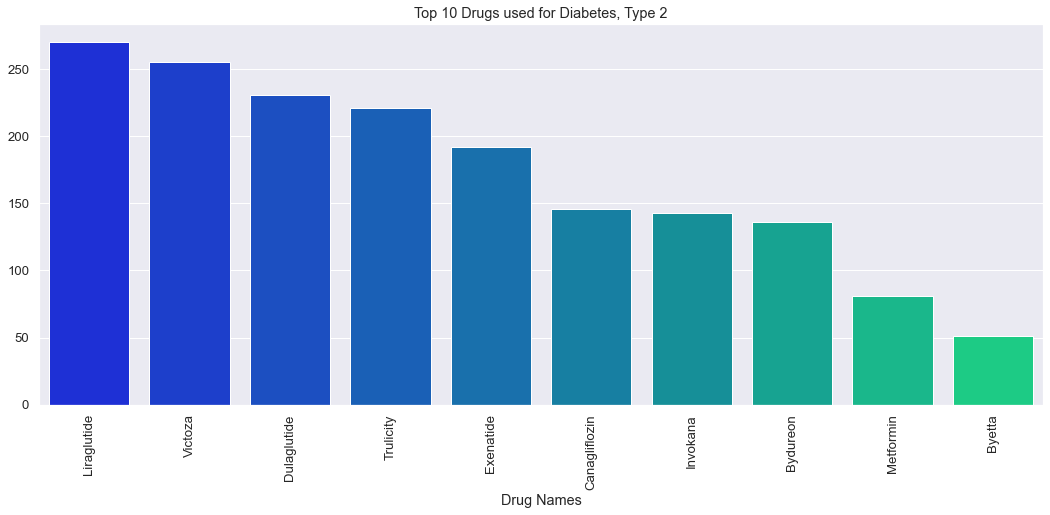

In [73]:
# Top 10 drugs which are used for the top condition, that is Diabetes, Type 2
df1 = data[data['condition'] == 'Diabetes, Type 2']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'winter')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Diabetes, Type 2")
plt.setp(sns_.get_xticklabels(), rotation = 90);

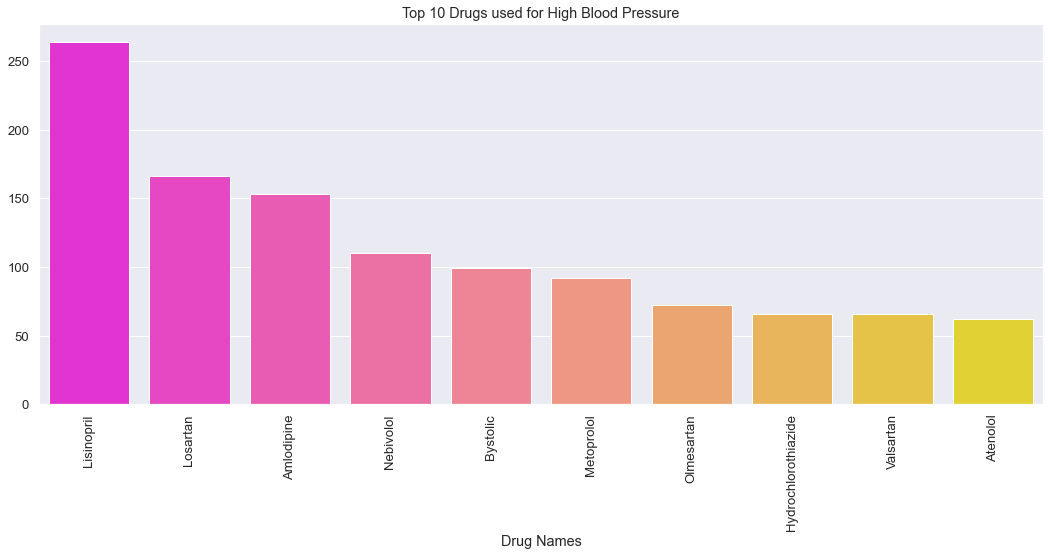

In [74]:
# Top 10 drugs which are used for the top condition, that is High Blood Pressure
df1 = data[data['condition'] == 'High Blood Pressure']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'spring')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for High Blood Pressure")
plt.setp(sns_.get_xticklabels(), rotation = 90);

 This a bar graph which exhibits the top 10 drug names for the people suffering from High Blood Pressure. In this data set 'Lisinopril' is the most prominent drug by a very big margin.

## VISUALIZATION OF REVIEWS

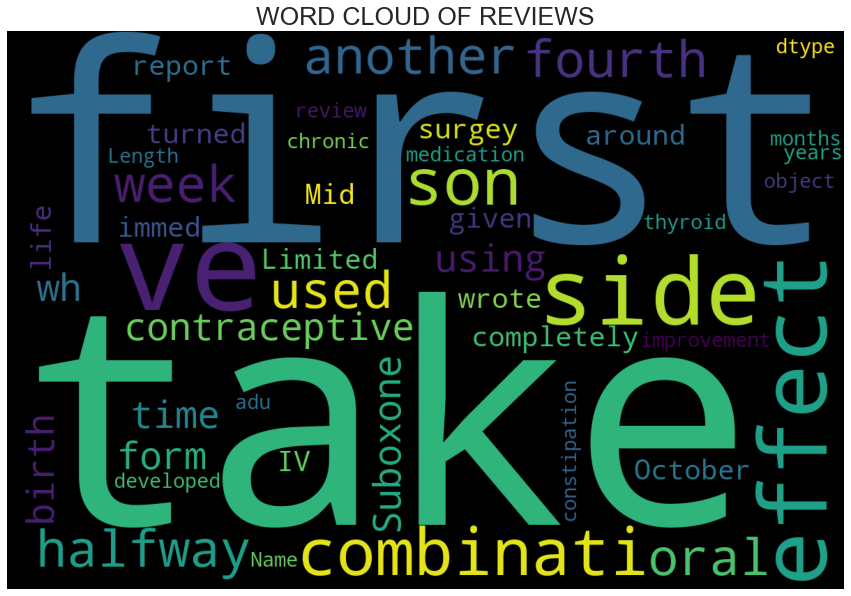

In [75]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [76]:
# feature engineering 
# let's make a new column review sentiment 

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    120570
0.0     39828
Name: Review_Sentiment, dtype: int64

In [1]:
# a pie chart to represent the sentiments of the patients

size = [121192, 40073]
colors = ['green', 'red']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

NameError: name 'plt' is not defined

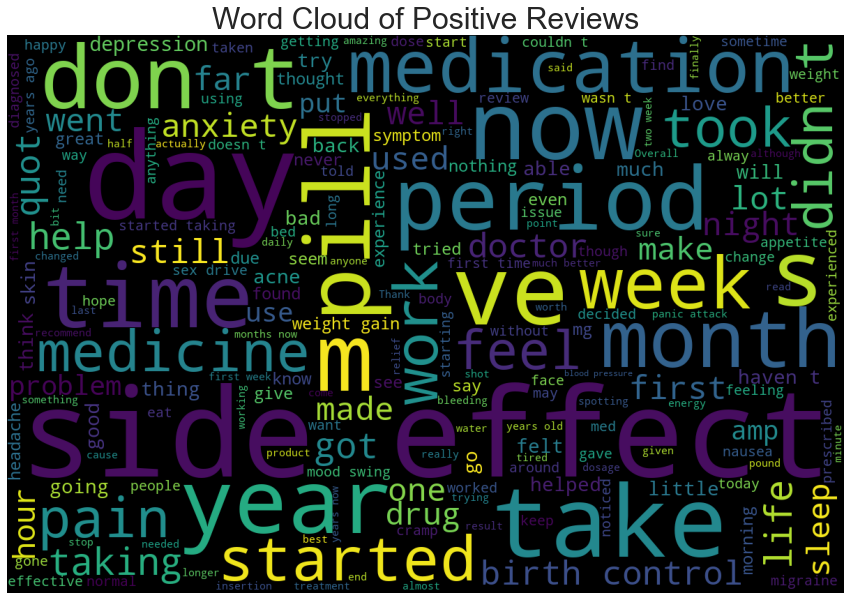

In [78]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

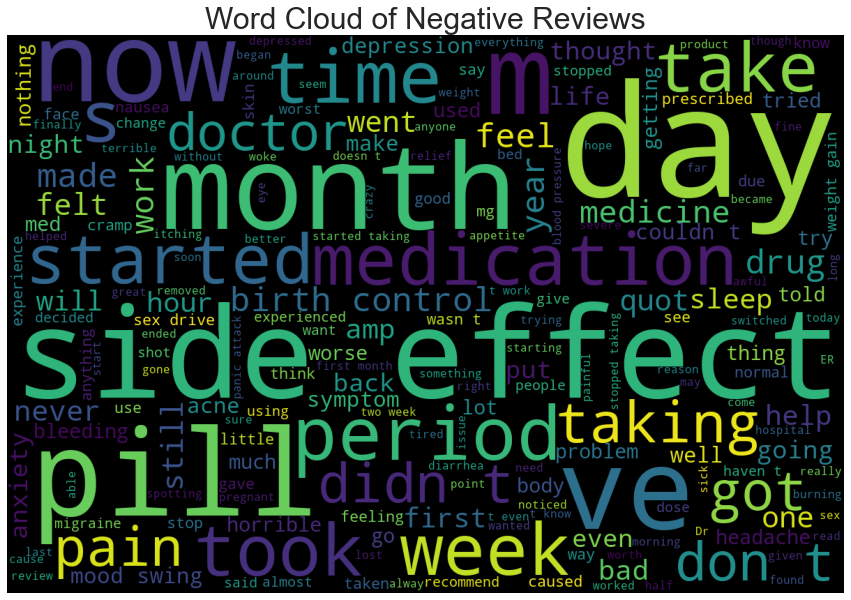

In [79]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


## VISUALIZATION OF REVIEWS BASED ON DATETIME

In [80]:
rk = data.copy()

In [81]:
# converting the date into datetime format
rk['date'] = pd.to_datetime(rk['date'], errors = 'coerce')

# now extracting year from date
rk['Year'] = rk['date'].dt.year

# extracting the month from the date
rk['month'] = rk['date'].dt.month

# extracting the days from the date
rk['day'] = rk['date'].dt.day

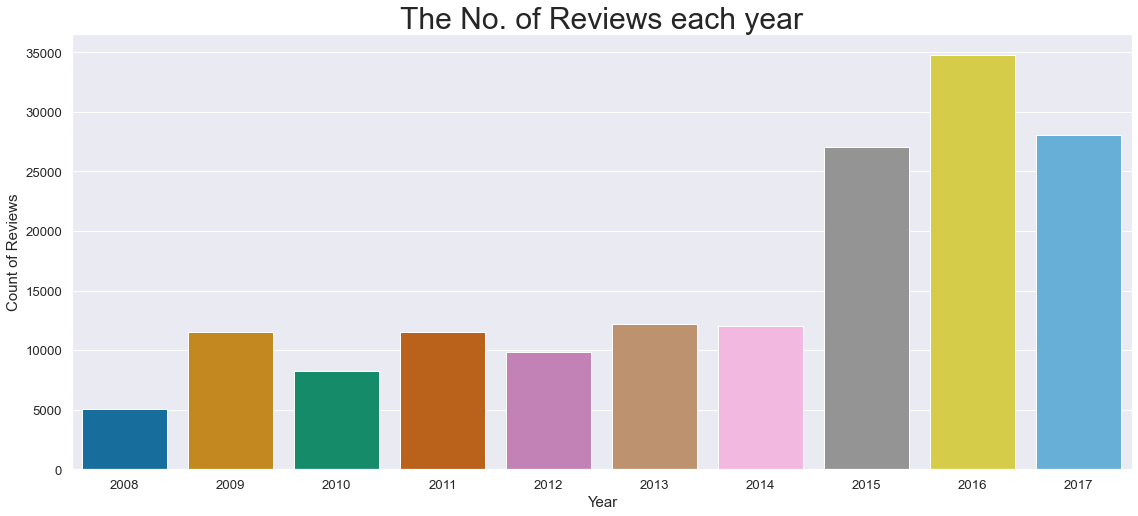

In [82]:
# looking at the no. of reviews in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(rk['Year'], palette ='colorblind')
plt.title('The No. of Reviews each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

 The is a Bar graph that shows the number of reviews in the data set per year. It can be inferred that most ratings are given in 2016 and 2008 has the least number of reviews

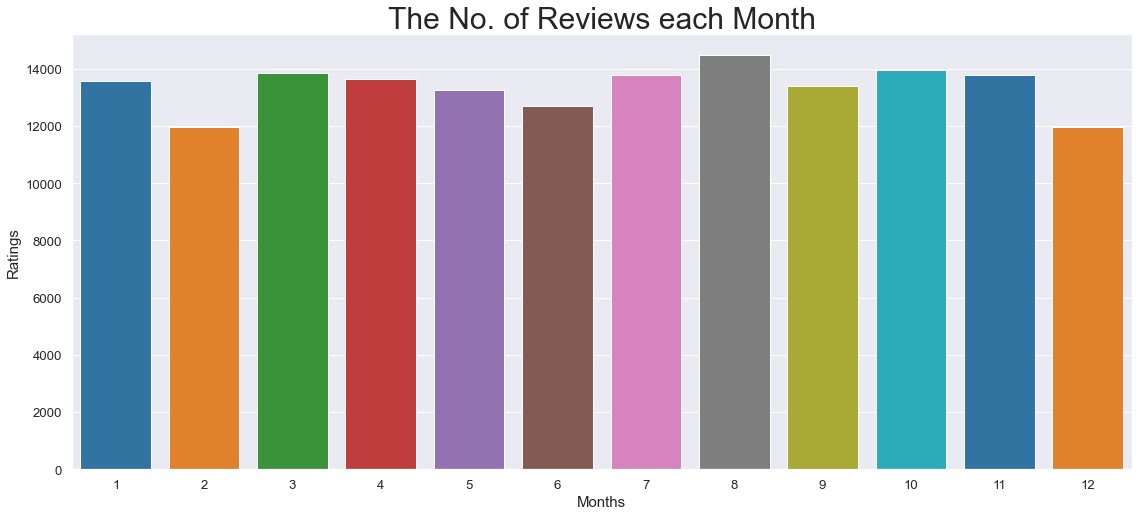

In [83]:
plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(rk['month'], palette ='tab10')
plt.title('The No. of Reviews each Month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

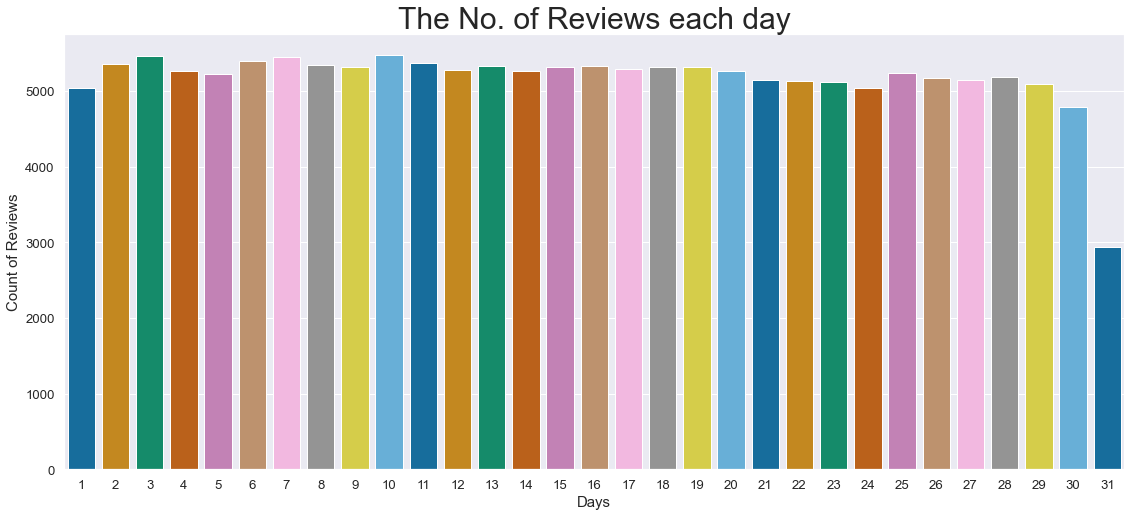

In [84]:
# looking at the no. of reviews in each of the day

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(rk['day'], palette ='colorblind')
plt.title('The No. of Reviews each day', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

## VISUALIZATION OF USEFUL COUNT

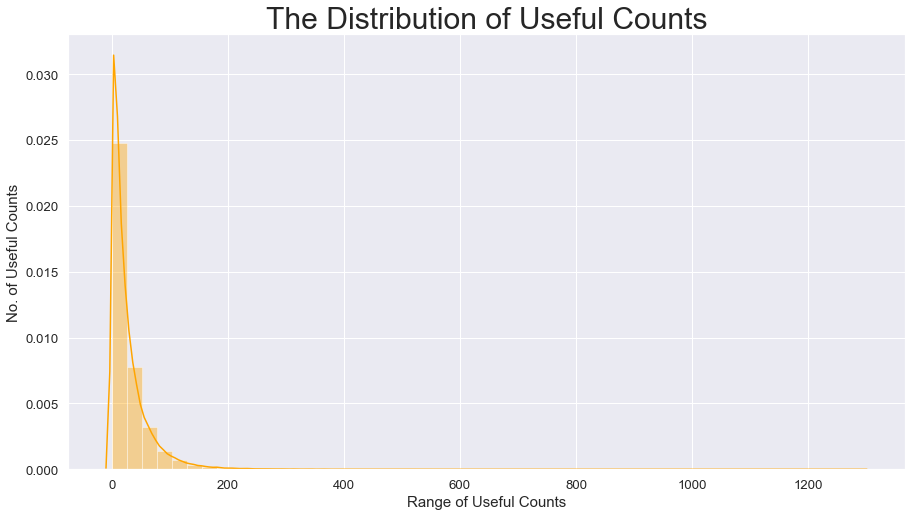

In [85]:
# plotting a dist plot

plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['usefulCount'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

In [86]:
data1 = data[(data['condition']== 'Depression')|(data['condition']== 'High Blood Pressure')|(data['condition']== 'Diabetes, Type 2')]

In [87]:
data1

Unnamed: 0        drugName            condition  \
11           75612  L-methylfolate           Depression   
31           96233      Sertraline           Depression   
44          121333     Venlafaxine           Depression   
50          156544     Dulaglutide     Diabetes, Type 2   
67          131909      Effexor XR           Depression   
...            ...             ...                  ...   
161251      198130      Metoprolol  High Blood Pressure   
161258       34443        Bystolic  High Blood Pressure   
161278       86533        Invokana     Diabetes, Type 2   
161286       93069    Vortioxetine           Depression   
161290      103458        Tekturna  High Blood Pressure   

                                                   review  rating  \
11      "I have taken anti-depressants for years, with...    10.0   
31      "1 week on Zoloft for anxiety and mood swings....     8.0   
44      "my gp started me on Venlafaxine yesterday to ...     4.0   
50      "Hey Guys,  It&#039;s been 4 months since my l...    10.0   
67      "This medicine saved my life. I was at my wits...    10.0   
...                                                   ...     ...   
161251  "It is fourth blood pressure pill for me. It f...     4.0   
161258  "While on Bystolic my feet and arms were numb....     1.0   
161278  "I just got diagnosed with type 2. My doctor p...     9.0   
161286  "This is the third med I&#039;ve tried for anx...     2.0   
161290  "I have only been on Tekturna for 9 days. The ...     7.0   

                    date  usefulCount  Review_Sentiment  
11         March 9, 2017           54               1.0  
31           May 7, 2011            3               1.0  
44        April 27, 2016            3               0.0  
50      October 24, 2017           24               1.0  
67         June 20, 2013          166               1.0  
...                  ...          ...               ...  
161251     July 15, 2009           39               0.0  
161258     July 18, 2009           25               0.0  
161278  October 23, 2015           47               1.0  
161286     July 17, 2016           33               0.0  
161290  February 7, 2010           18               1.0  

[13944 rows x 8 columns]

In [88]:
new = data1.drop(['Unnamed: 0',"drugName",'rating','date','usefulCount'],axis = 1)

In [89]:
new

condition  \
11               Depression   
31               Depression   
44               Depression   
50         Diabetes, Type 2   
67               Depression   
...                     ...   
161251  High Blood Pressure   
161258  High Blood Pressure   
161278     Diabetes, Type 2   
161286           Depression   
161290  High Blood Pressure   

                                                   review  Review_Sentiment  
11      "I have taken anti-depressants for years, with...               1.0  
31      "1 week on Zoloft for anxiety and mood swings....               1.0  
44      "my gp started me on Venlafaxine yesterday to ...               0.0  
50      "Hey Guys,  It&#039;s been 4 months since my l...               1.0  
67      "This medicine saved my life. I was at my wits...               1.0  
...                                                   ...               ...  
161251  "It is fourth blood pressure pill for me. It f...               0.0  
161258  "While on Bystolic my feet and arms were numb....               0.0  
161278  "I just got diagnosed with type 2. My doctor p...               1.0  
161286  "This is the third med I&#039;ve tried for anx...               0.0  
161290  "I have only been on Tekturna for 9 days. The ...               1.0  

[13944 rows x 3 columns]

In [90]:
new.condition.value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [91]:
# Segregating dataframe for analyzing individual condition
new_depression = new[(new['condition']=='Depression')]
new_diabetes = new[(new['condition']=='Diabetes, Type 2')]
new_Bp = new[(new['condition']=='High Blood Pressure')]

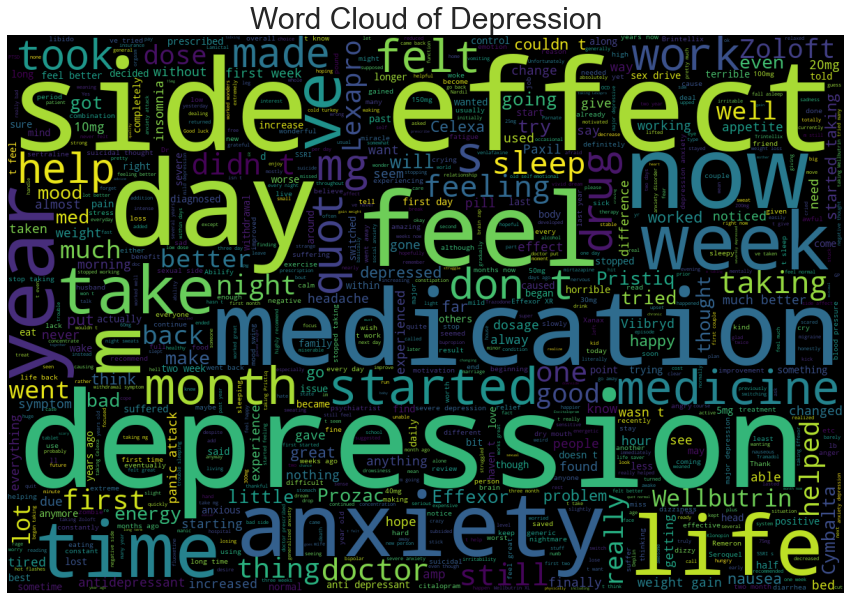

In [92]:
# making Words cloud for the condition of Depession

from wordcloud import WordCloud
plt.figure(figsize = (15,15))
wordcloud = WordCloud(max_words = 800, width = 1200, height = 800).generate(" ".join(new_depression.review))
plt.title('Word Cloud of Depression', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

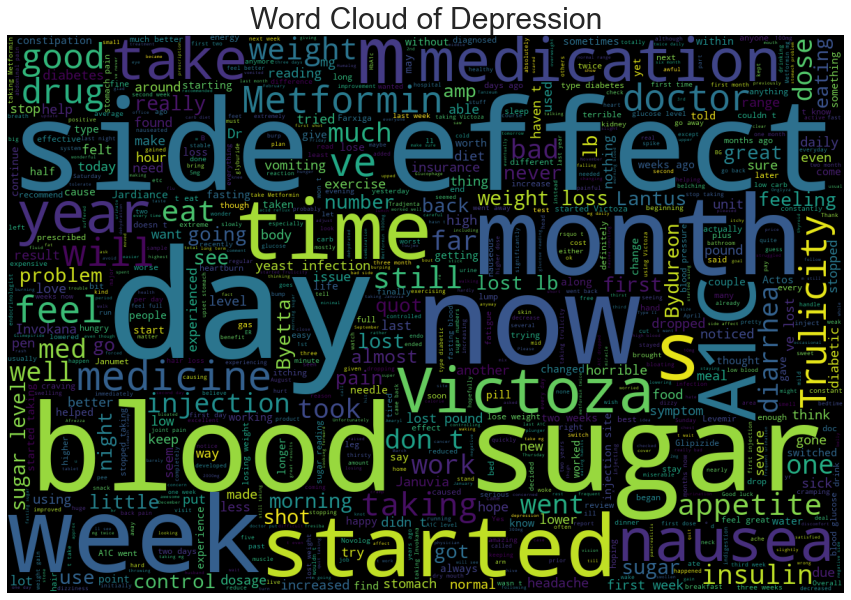

In [93]:
# making Words cloud for the condition of Diabetes, Type 2

from wordcloud import WordCloud
plt.figure(figsize = (15,15))
wordcloud = WordCloud(max_words = 800, width = 1200, height = 800).generate(" ".join(new_diabetes.review))
plt.title('Word Cloud of Depression', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

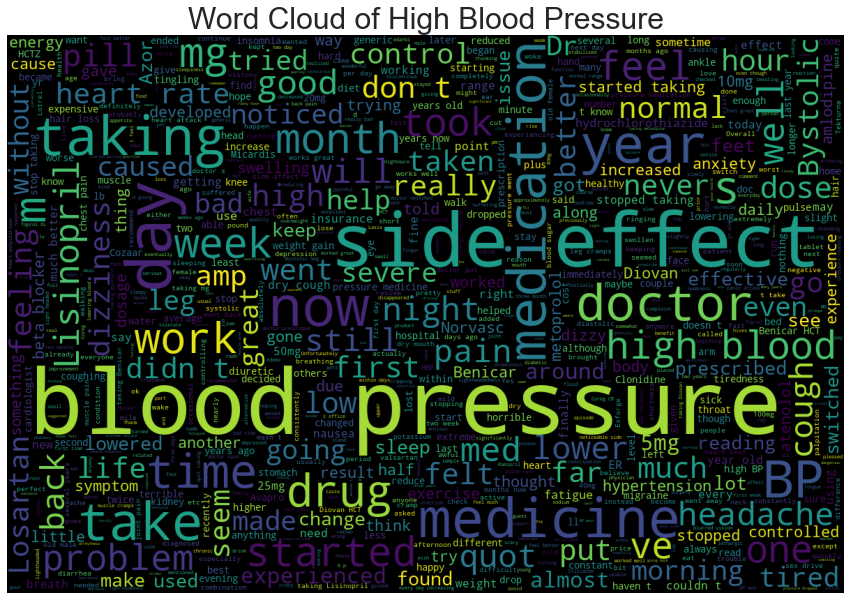

In [94]:
# making Words cloud for the condition of High Blood Pressure 

from wordcloud import WordCloud
plt.figure(figsize = (15,15))
wordcloud = WordCloud(max_words = 800, width = 1200, height = 800).generate(" ".join(new_Bp.review))
plt.title('Word Cloud of High Blood Pressure', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Data preprocessing

In [95]:
new['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [96]:
new['review'][152]

KeyError: 152

In [97]:
for i, col in enumerate(new.columns):
    if new[col].dtype == 'object':  # Check if column data type is string
        new.iloc[:, i] = new.iloc[:, i].str.replace('""', '')
    else:
        new.iloc[:, i] = new.iloc[:, i].astype(str).str.replace('""', '')


In [98]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

In [99]:
new

condition  \
11      Depression            
31      Depression            
44      Depression            
50      Diabetes, Type 2      
67      Depression            
...            ...            
161251  High Blood Pressure   
161258  High Blood Pressure   
161278  Diabetes, Type 2      
161286  Depression            
161290  High Blood Pressure   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 review  \
11      "I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."                                                                                                                                                                                                                                                                                                              
31      "1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one  but that subsided as the week went on.  I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
44      "my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"                                                           
50      "Hey Guys,  It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work.  So, I have been on Trulicity for six months now with Metformin.  When I hit the five month period the diarrhea, gas, sulphur belching finally subsided.  I now longer have any of those side effects.  However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so

## Stopwords

In [100]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [101]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Lemmitization

In [102]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [103]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [104]:
nltk.download('omw-1.4')
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


sportingly
very
troubled


In [105]:
from bs4 import BeautifulSoup
import re
import string

In [106]:
def review_to_words(raw_review):
    # delete html 
    review_text = BeautifulSoup(raw_review,'html.parser').get_text()
    # make a space
    latters_only = re.sub('[^a-zA-Z]', ' ',review_text)
    # lower letters
    words = latters_only.lower().split()
    # stop words
    meaningful_words = [w for w in words if not w in stop]
    # lemmitization
    lemmatize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    #space join words
    return(' '.join(lemmatize_words))

In [107]:
new['review_clean']=new['review'].apply(review_to_words)

In [108]:
new.head()

condition  \
11  Depression         
31  Depression         
44  Depression         
50  Diabetes, Type 2   
67  Depression         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             review  \
11  "I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."                                                                                                                                                                                                                                                                                                              
31  "1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one  but that subsided as the week went on.  I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
44  "my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"                                                           
50  "Hey Guys,  It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work.  So, I have been on Trulicity for six months now with Metformin.  When I hit the five month period the diarrhea, gas, sulphur belching finally subsided.  I now longer have any of those side effects.  However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol.  I have been back on the Metformin with Trulicity for about a week now, so we will see what this does.  I was diagnosed as  stage 3 chronic kidney disease (CKD 3) so I am watching diet clos

## Creating Features and Target Variable

In [109]:
X = new['review_clean']
y = new['condition']

In [110]:
# stratify the proportions of all categories are maintained in both train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2,random_state=0)

In [111]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Bag of Words

In [112]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [113]:
count_train

<11155x11173 sparse matrix of type '<class 'numpy.int64'>'
	with 329230 stored elements in Compressed Sparse Row format>

## Machine Learning Models

## Naive Bayes

accuracy:   0.955
Confusion matrix, without normalization


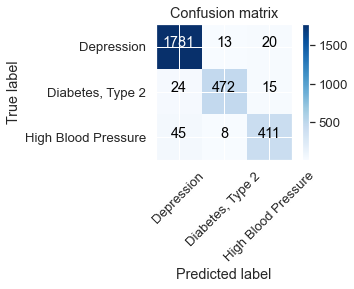

In [114]:
from sklearn.naive_bayes import MultinomialNB 
import itertools 
from sklearn import metrics
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])


## Passive Aggressive Classifier

accuracy:   0.950
Confusion matrix, without normalization


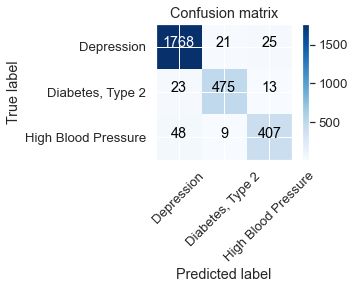

In [115]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

# TFIDF

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## Machine Learning Models

## Naive Bayes

accuracy:   0.896
Confusion matrix, without normalization


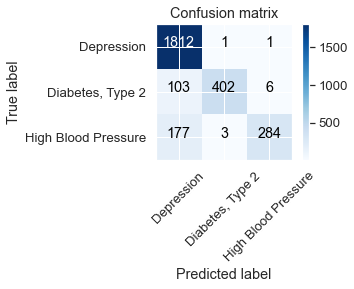

In [117]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

## TFIDF

accuracy:   0.961
Confusion matrix, without normalization


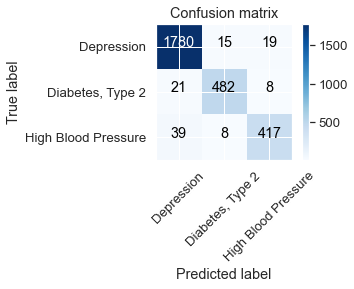

In [118]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

## TFIDF: Bigrams

In [119]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy:   0.966
Confusion matrix, without normalization


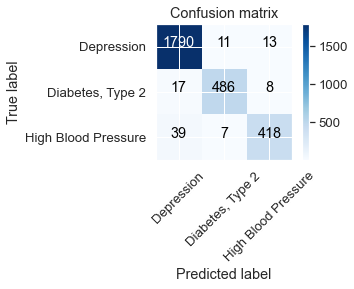

In [120]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

## TFIDF : Trigrams

accuracy:   0.967
Confusion matrix, without normalization


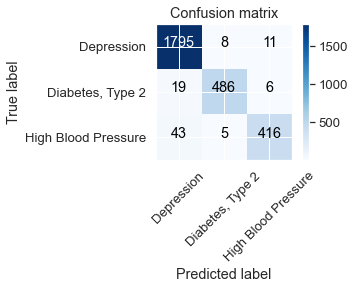

In [121]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plt.figure(figsize = (5,4))
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

##  Doc2Vec embedding model



In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(new['review_clean'], new['condition'], test_size=0.2, random_state=42)

# Tokenize the reviews for Doc2Vec
train_corpus = [TaggedDocument(words=text.split(), tags=[i]) for i, text in enumerate(X_train)]
test_corpus = [TaggedDocument(words=text.split(), tags=[i]) for i, text in enumerate(X_test)]

# Train the Doc2Vec model
vector_size = 100
window_size = 5
min_count = 2
workers = 4
epochs = 20
model = Doc2Vec(train_corpus, vector_size=vector_size, window=window_size, min_count=min_count, workers=workers, epochs=epochs)

# Convert the text data to vector embeddings using the trained Doc2Vec model
X_train_vec = [model.infer_vector(doc.words) for doc in train_corpus]
X_test_vec = [model.infer_vector(doc.words) for doc in test_corpus]

# Convert the target variable to one-hot encoding
y_train_onehot = np_utils.to_categorical(y_train.factorize()[0])
y_test_onehot = np_utils.to_categorical(y_test.factorize()[0])

# Define the neural network model
model_nn = Sequential()
model_nn.add(Dense(units=256, activation='relu', input_dim=vector_size))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(units=128, activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(units=3, activation='softmax'))
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the neural network model
batch_size = 32
epochs = 50
model_nn.fit(np.array(X_train_vec), y_train_onehot, batch_size=batch_size, epochs=epochs, verbose=1)

# Test the neural network model
y_pred_onehot = model_nn.predict(np.array(X_test_vec))
y_pred = np.argmax(y_pred_onehot, axis=1)
accuracy = accuracy_score(y_test.factorize()[0], y_pred)
print(f"Accuracy: {accuracy:.2f}")


ModuleNotFoundError: No module named 'keras'

## Most important Features

In [123]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)

In [124]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Depression')

Depression snack lost 2.413943923027145
Depression shoulder hip 2.7172008517945585
Depression yes deffo 2.7978813608917203
Depression evening taper 3.009797061758444
Depression know possible 3.0245915851154614
Depression prescribed effect 3.418689845285072
Depression beginning nightmare 3.6477766393903277
Depression helpful prozac 3.8530553608266715
Depression better allows 4.7263348488578965
Depression laugh alot 9.688438074914004


In [125]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'High Blood Pressure')

High Blood Pressure compulsive overeating 2.4269418283923576
High Blood Pressure manageable biggest 2.4826210329067537
High Blood Pressure difference helped 2.6643492890605422
High Blood Pressure chance make 2.8396324086766653
High Blood Pressure ect work 2.8764669784843404
High Blood Pressure bad quit 3.5047467722982804
High Blood Pressure day making 3.6437117890142767
High Blood Pressure difference thing 5.829423327540927
High Blood Pressure haemodialysis 6.35295414264958
High Blood Pressure doctor valturna 8.732389249856531


In [126]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 anxiety worker 2.037425348322914
Diabetes, Type 2 turmeric negative 2.1271232906200117
Diabetes, Type 2 pound imagine 2.1825853033487173
Diabetes, Type 2 seroquel doctor 2.267565520241075
Diabetes, Type 2 aggressive taking 2.4530277974734904
Diabetes, Type 2 eat gm 3.2839330026717195
Diabetes, Type 2 little le 3.309730149360664
Diabetes, Type 2 eating breakfast 3.4325968418436545
Diabetes, Type 2 took diltiazem 3.780127658364177
Diabetes, Type 2 diltiazem leaf 4.309192572648247


## Sample Predictions

In [127]:
new.tail()

condition  \
161251  High Blood Pressure   
161258  High Blood Pressure   
161278  Diabetes, Type 2      
161286  Depression            
161290  High Blood Pressure   

                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
161251  "It is fourth blood pressure pill for me. It feels like it is only partly working. My blood pressure problems are usually happening after anxiety attacks of which doctors says I have but don&#039;t know why."                                                                                                                                                                                                                                   
161258  "While on Bystolic my feet and arms were numb. My blood sugars became severely elevated from 112 glucose up to 249. This blood pressure pill is not a good choice for my diabetic condition. I was only on Bystolic for one week and now eight weeks later I am still suffering from foot and heel pain. However, going back on Vasotec my blood sugars have dropped back down to 112."                                                            
161278  "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I  am losing so much weight. No side effects yet. Miracle medicine for me"                                                                                                                                                                                                                    
161286  "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap."                                                                                                                                                                                                          
161290  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."   

       Review_Sentiment  \
161251  0.0               
161258  0.0               
161278  1.0               
161286  0.0               
161290  1.0               

                                                                                                                                                                                                                                                                       review_clean  
161251  fourth blood pressure pill feel like partly working blood pressure problem usually happening anxiety attack doctor say know                                                                                                                                                  
161258  bystolic foot arm numb blood sugar became severely elevated glucose blood pressure pill good choice diabetic condition bystolic one week eight week later still suffering foot heel pain however going back vasotec blood sugar dropped back                                 
161278  got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine              

In [128]:
## Function for Extracting Top drugs

def top_drugs_extractor(condition):
    df_top = data[(data['rating']>=9)&(data['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [129]:
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(lst_text)
    prediction = pass_tf.predict(tfidf_bigram)
    df_test['prediction']=prediction
    return df_test

In [130]:
sentences = [ "While on Bystolic my feet and arms were numb. My blood sugars became severely elevated from 112 glucose up to 249. This blood pressure pill is not a good choice for my diabetic condition. I was only on Bystolic for one week and now eight weeks later I am still suffering from foot and heel pain. However, going back on Vasotec my blood sugars have dropped back down to 112.",
              "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap",
              "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"
            ]

In [131]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)


predictions = pass_tf.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label=="High Blood Pressure":
        target="High Blood Pressure"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Diabetes, Type 2":
        target="Diabetes, Type 2"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

text: While on Bystolic my feet and arms were numb. My blood sugars became severely elevated from 112 glucose up to 249. This blood pressure pill is not a good choice for my diabetic condition. I was only on Bystolic for one week and now eight weeks later I am still suffering from foot and heel pain. However, going back on Vasotec my blood sugars have dropped back down to 112. 
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Losartan
Aldactone
Spironolactone

text: This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap 
Condition: Depression
Top 3 Suggested Drugs:
Sertraline
Zoloft
Viibryd

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine f

In [132]:
df_testsent = predict_text(sentences)
df_testsent

test_sent  \
0  bystolic foot arm numb blood sugar became severely elevated glucose blood pressure pill good choice diabetic condition bystolic one week eight week later still suffering foot heel pain however going back vasotec blood sugar dropped back   
1  third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap                                                                                                                    
2  got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine                                                                                            

            prediction  
0  High Blood Pressure  
1  Depression           
2  Diabetes, Type 2

In [133]:
import joblib
joblib.dump(tfidf_vectorizer3, 'tfidfvectorizer.pkl')
joblib.dump(pass_tf, 'passmodel.pkl')

['passmodel.pkl']

In [134]:
vectorizer = joblib.load('tfidfvectorizer.pkl')
model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations"]))
test[0]

'High Blood Pressure'